In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Function for preprocessing signature images
def preprocess_image(image):
    # Resize the image to match VGG16 input size
    image_resized = cv2.resize(image, (224, 224))
    # Convert the image to RGB (if it's in BGR format)
    if len(image_resized.shape) == 2:
        image_resized = cv2.cvtColor(image_resized, cv2.COLOR_GRAY2RGB)
    else:
        image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    # Normalize the pixel values
    image_normalized = image_resized / 255.0
    return image_normalized

# Load genuine and forged images
real_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine'
forge_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged'

real_images = [preprocess_image(cv2.imread(os.path.join(real_path, img_name))) for img_name in os.listdir(real_path)]
forge_images = [preprocess_image(cv2.imread(os.path.join(forge_path, img_name))) for img_name in os.listdir(forge_path)]


In [27]:

# Create labels for genuine (0) and forged (1) signatures
real_labels = np.zeros(len(real_images))
forge_labels = np.ones(len(forge_images))

# Combine data and labels
X_data = np.concatenate((real_images, forge_images), axis=0)
y_labels = np.concatenate((real_labels, forge_labels), axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(units=256, activation='relu'),
    Dropout(rate=0.5),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/30
29/29 [==============================] - 7s 172ms/step - loss: 1.1835 - accuracy: 0.5517 - val_loss: 0.6268 - val_accuracy: 0.6087
Epoch 2/30
29/29 [==============================] - 5s 167ms/step - loss: 0.6200 - accuracy: 0.6442 - val_loss: 0.6003 - val_accuracy: 0.6609
Epoch 3/30
29/29 [==============================] - 4s 152ms/step - loss: 0.5737 - accuracy: 0.6725 - val_loss: 0.5828 - val_accuracy: 0.6696
Epoch 4/30
29/29 [==============================] - 4s 153ms/step - loss: 0.5620 - accuracy: 0.6855 - val_loss: 0.5556 - val_accuracy: 0.6913
Epoch 5/30
29/29 [==============================] - 4s 154ms/step - loss: 0.5179 - accuracy: 0.7138 - val_loss: 0.5488 - val_accuracy: 0.7043
Epoch 6/30
29/29 [==============================] - 5s 167ms/step - loss: 0.4904 - accuracy: 0.7486 - val_loss: 0.5211 - val_accuracy: 0.7217
Epoch 7/30
29/29 [==============================] - 4s 153ms/step - loss: 0.4492 - accuracy: 0.7965 - val_loss: 0.4971 - val_accuracy: 0.7478
Epoch 

In [31]:
model.save("/content/drive/MyDrive/JETTI PROJECTS/MINI project/Trained_model_files/team_collected_data_vgg16_cnn_80.87%.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


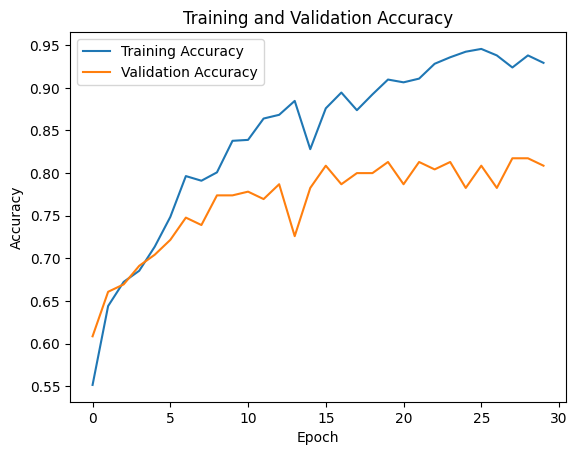

In [32]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Save the graph as an image file
plt.savefig("/content/drive/MyDrive/JETTI PROJECTS/MINI project/Trained_model_files/Graphs/training_validation_accuracy 80.87%(VGG16_CNN_team_data).png")

# Show the plot
plt.show()


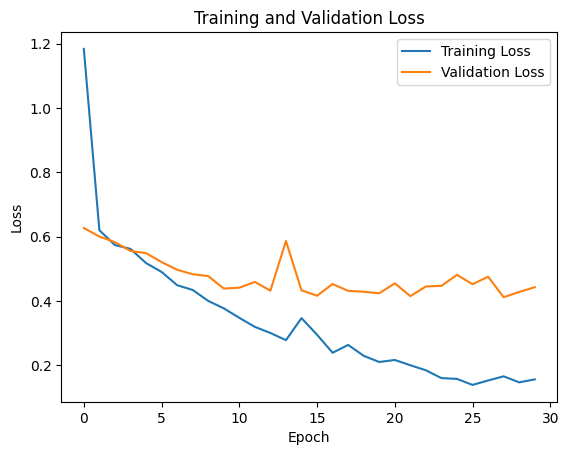

In [33]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/JETTI PROJECTS/MINI project/Trained_model_files/Graphs/Training and Validation Loss 80.87%(VGG16_CNN_team_data).png")

plt.show()

8/8 [==============================] - 1s 129ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       140
           1       0.73      0.78      0.75        90

    accuracy                           0.80       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.80      0.80      0.80       230



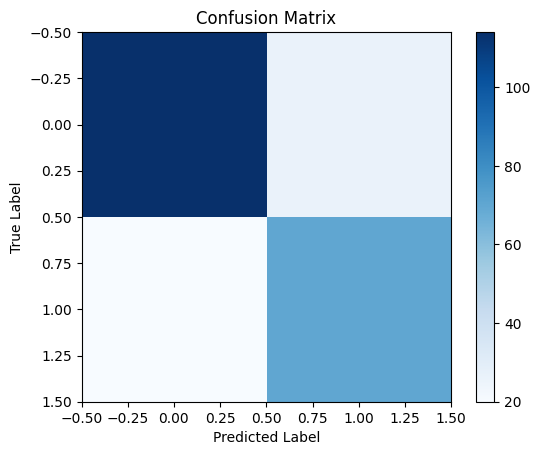

In [38]:
from sklearn.metrics import classification_report, confusion_matrix


# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

# Convert the labels to integers directly
y_test_int = np.array(y_test, dtype=int)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_int, y_pred_classes))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_classes)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


forge images

/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0091.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0090.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0098.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0109.jpg

real images

/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05403054.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05404054.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05603056.jpg
/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05702057.jpg

In [35]:
import cv2
import numpy as np

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Adjust the size according to your model's input size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the single image for testing
image_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/genuine/05403054.jpg'
# Preprocess the single image
image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(image)

# Convert the prediction to a binary result
result = "Forged" if prediction[0][0] > 0.5 else "Genuine"

# Print the result
print(f"The signature is predicted as: {result}")


1/1 [==============================] - 0s 34ms/step
The signature is predicted as: Genuine


In [36]:
import cv2
import numpy as np

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Adjust the size according to your model's input size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the single image for testing
image_path = '/content/drive/MyDrive/JETTI PROJECTS/MINI project/final collected data set/forged/IMG-20240213-WA0090.jpg'
# Preprocess the single image
image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(image)

# Convert the prediction to a binary result
result = "Forged" if prediction[0][0] > 0.5 else "Genuine"

# Print the result
print(f"The signature is predicted as: {result}")


1/1 [==============================] - 0s 18ms/step
The signature is predicted as: Forged


In [37]:
from keras.models import load_model
import numpy as np

# Load the trained model
model = load_model('/content/drive/MyDrive/JETTI PROJECTS/MINI project/Trained_model_files/team_collected_data_vgg16_cnn_83%.h5')  # Update with the correct path and file name

# Assuming you have test data X_test and corresponding labels y_test
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


8/8 [==============================] - 1s 105ms/step - loss: 0.4334 - accuracy: 0.8000
Test Loss: 0.4334
Test Accuracy: 0.8000
